In [0]:
#Import Dependencies
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
#Callable Functions
#Normalisation Function: 0 for mean/std. 1 for min/max
def normalise(dataframe, normalisation_type = 0):
  
    column_names = dataframe.columns
    normalised_output = pd.DataFrame()
    
    for i in range(len(column_names)):
      train_array = np.array(dataframe[column_names[i]])
      
      if normalisation_type == 0:
        array_mean = np.mean(train_array)
        array_std = np.std(train_array)
        normalised_column = (train_array - array_mean) / array_std
      
      elif normalisation_type == 1:
        array_min = np.min(train_array)
        array_max = np.max(train_array)
        normalised_column = (train_array - array_min) / (array_max - array_min)
      
      normalised_column_df = pd.DataFrame(pd.Series(normalised_column), columns = [column_names[i]])
      normalised_output = pd.concat([normalised_output, normalised_column_df], axis = 1)
      
    return normalised_output

#Import training and test data
train_data_raw = pd.read_csv('sample_data/california_housing_train.csv')
test_data_raw = pd.read_csv('sample_data/california_housing_test.csv')

#Remove meta-data
train_data = train_data_raw.drop(columns = ['longitude', 'latitude'])
test_data = test_data_raw.drop(columns = ['longitude', 'latitude'])

#Other Constants or Variables
least_clusters = 2
most_clusters = 10
number_of_clusters = range(least_clusters, most_clusters+1)
total_train_samples = len(train_data)
total_test_samples = len(test_data)
sum_squared_error_list = []

print('Performing computation for up to {} clusters...'.format(most_clusters))

#Main interation loop
for cluster_count in number_of_clusters:
  
  #Normalise Dataset
  normalised_dataframe = normalise(train_data, 0)
    
  #Perform KMeans
  kmeans = KMeans(n_clusters = cluster_count, random_state = 0, max_iter = 500).fit(normalised_dataframe)
  distance = kmeans.transform(normalised_dataframe)
  distance_df = pd.DataFrame(distance)
  label_df = pd.DataFrame(pd.Series(kmeans.labels_), columns = ['labels'])
  labelled_distance_df = pd.concat([distance_df, label_df], axis = 1)
  
  #Compute the mean distance for all datapoints in a cluster to its cluster center
  mean_distances = []
  for j in range(cluster_count):
    cluster_total_distance = 0
    number_points_in_cluster = 0
    for i in range(total_train_samples):
      if labelled_distance_df['labels'][i] == j:
        cluster_total_distance += labelled_distance_df[j][i]
        number_points_in_cluster += 1
    mean_cluster_distance = cluster_total_distance / number_points_in_cluster
    mean_distances.append(mean_cluster_distance)
  
  #Find the difference between distance from datapoint to cluster center and the mean distance to the cluster center.
  SSE = 0
  for j in range(cluster_count):
    for i in range(total_train_samples):
      if labelled_distance_df['labels'][i] == j:
        SSE += np.sum((labelled_distance_df[j][i] - mean_distances[j])**2)
        
  sum_squared_error_list.append([cluster_count, SSE])
  print('Completed for {} cluster(s). Sum Squared Error: {}'.format(cluster_count, SSE))

Performing computation for up to 10 clusters...
Completed for 2 cluster(s). Sum Squared Error: 18377.40015199647
Completed for 3 cluster(s). Sum Squared Error: 13497.924258031444
Completed for 4 cluster(s). Sum Squared Error: 8743.063568362491
Completed for 5 cluster(s). Sum Squared Error: 7149.125520829593
Completed for 6 cluster(s). Sum Squared Error: 6247.865218428116
Completed for 7 cluster(s). Sum Squared Error: 5587.766775711535
Completed for 8 cluster(s). Sum Squared Error: 5278.904560993149
Completed for 9 cluster(s). Sum Squared Error: 4650.000192638956
Completed for 10 cluster(s). Sum Squared Error: 4516.668587255639


Text(0, 0.5, 'Sum Squared Error')

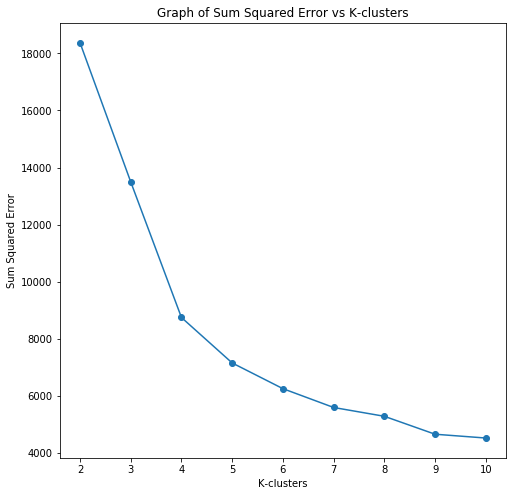

In [0]:
#Graph Elbowpoint
x_list = []
y_list = []

for i, c in sum_squared_error_list:
  x_list.append(i)
  y_list.append(c)

ax = plt.figure(figsize = [8, 8]).add_subplot(111)
ax.plot(x_list, y_list, marker = 'o')
plt.title('Graph of Sum Squared Error vs K-clusters')
plt.xlabel('K-clusters')
plt.ylabel('Sum Squared Error')

Class 3: 430 Points
Class 2: 9466 Points
Class 1: 3634 Points
Class 0: 3470 Points


Text(0, 0.5, 'Latitude')

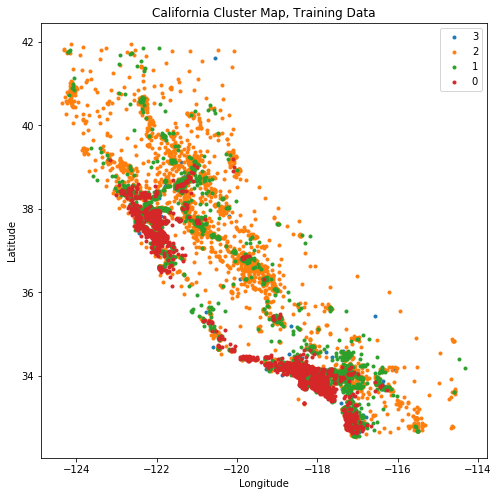

In [0]:
#Perform KMeans using Elbowpoint K-cluster
elbowpoint_cluster = 4

#Normalise Data
normalised_dataframe = normalise(train_data, 0)
    
#Perform KMeans and find labels for each datapoint
kmeans = KMeans(n_clusters = elbowpoint_cluster, random_state = 0, max_iter = 500).fit(normalised_dataframe)
label_df = pd.DataFrame(pd.Series(kmeans.labels_), columns = ['labels'])
labelled_train_data_raw = pd.concat([train_data_raw, label_df], axis = 1)

#Plot Graph
plt.figure(figsize= [8, 8])
for j in reversed(range(elbowpoint_cluster)):
  plot_list = []
  for i in range(total_train_samples):
    if labelled_train_data_raw['labels'][i] == j:
      plot_list.append([labelled_train_data_raw['longitude'][i], labelled_train_data_raw['latitude'][i]])
    
  x_list = []
  y_list = []

  for x, y in plot_list:
    x_list.append(x)
    y_list.append(y)
  
  print('Class {}: {} Points'.format(j, len(x_list)))
  plt.scatter(x_list, y_list, marker = '.')
  plt.title('California Cluster Map, Training Data')
plt.legend(list(reversed(range(elbowpoint_cluster))))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Class 3: 67 Points
Class 2: 1637 Points
Class 1: 688 Points
Class 0: 608 Points


Text(0, 0.5, 'Latitude')

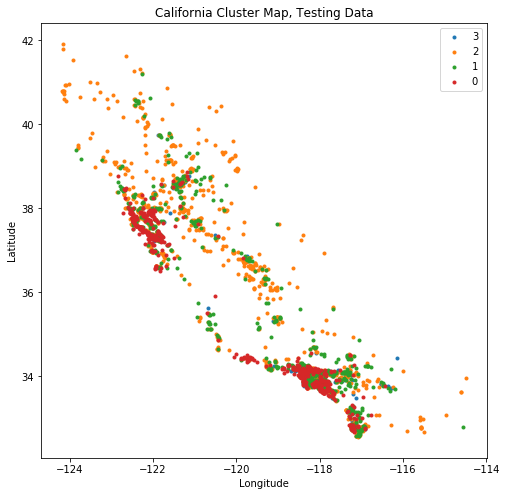

In [0]:
#Perform KMeans using Elbowpoint K-cluster
elbowpoint_cluster = 4

#Normalise Data
normalised_dataframe = normalise(train_data, 0)
normalised_dataframe_test = normalise(test_data, 0)
    
#Perform KMeans and find labels for each datapoint
kmeans = KMeans(n_clusters = elbowpoint_cluster, random_state = 0, max_iter = 500).fit(normalised_dataframe)
label_df = pd.DataFrame(pd.Series(kmeans.predict(normalised_dataframe_test)), columns = ['labels'])
labelled_test_data_raw = pd.concat([test_data_raw, label_df], axis = 1)

#Plot Graph
plt.figure(figsize= [8, 8])
for j in reversed(range(elbowpoint_cluster)):
  plot_list = []
  for i in range(total_test_samples):
    if labelled_test_data_raw['labels'][i] == j:
      plot_list.append([labelled_test_data_raw['longitude'][i], labelled_test_data_raw['latitude'][i]])
    
  x_list = []
  y_list = []

  for x, y in plot_list:
    x_list.append(x)
    y_list.append(y)
  
  print('Class {}: {} Points'.format(j, len(x_list)))
  plt.scatter(x_list, y_list, marker = '.')
  plt.title('California Cluster Map, Testing Data')
plt.legend(list(reversed(range(elbowpoint_cluster))))
plt.xlabel('Longitude')
plt.ylabel('Latitude')